In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from model import GolemTS2
from generate_data import SyntheticDataset

In [3]:
d = 10
p = 1
n = 1000

A_init = np.random.randn((p+1) *d, d)
dag_obj = SyntheticDataset(n=n, d=d, p=p, B_scale=1.0, graph_type='ER', degree=2, A_scale=1.0, noise_type='NV')
model = GolemTS2(n=n, d=d, p=p, Y=dag_obj.Y, lambda_1=1.5e-2, lambda_2=5.0, A_init=None, ev=False, lr=3e-3, lambda_3=2.0)

In [4]:
import trainer
likes, evs = trainer.train(model, dag_obj.Y, epochs=50_000, warmup_epochs=20_000, log=True)

likelihood: 58.291015625
Score: 58.291015625
nan
likelihood: 49.50205993652344
Score: 50.864097595214844
-0.12741102
likelihood: 48.65861892700195
Score: 49.895809173583984
-0.019036775


/Users/valen/Documents/GitHub/dsc180ProjectB/GOLEMTS/trainer.py:25: RuntimeWarning: invalid value encountered in scalar divide
  print((score.detach().numpy() - scores[-1]) / scores[-1])
/Users/valen/Documents/GitHub/dsc180ProjectB/GOLEMTS/trainer.py:26: RuntimeWarning: invalid value encountered in scalar divide
  if es and np.abs(score.detach().numpy() - scores[-1]) / scores[-1] < es_tol:


likelihood: 48.33359909057617
Score: 49.52964401245117
-0.0073385956
likelihood: 48.173465728759766
Score: 49.117122650146484
-0.008328777
likelihood: 48.08515548706055
Score: 48.92164993286133
-0.0039797267
likelihood: 48.02763748168945
Score: 48.83309555053711
-0.0018101267
likelihood: 47.980438232421875
Score: 48.63241195678711
-0.0041095815
likelihood: 47.949737548828125
Score: 48.542903900146484
-0.0018405021
likelihood: 47.918731689453125
Score: 48.56966781616211
0.0005513456
likelihood: 47.893070220947266
Score: 48.467491149902344
-0.0021037136
likelihood: 47.88542175292969
Score: 48.451026916503906
-0.00033969642
likelihood: 47.85478591918945
Score: 48.495201110839844
0.00091172877
likelihood: 47.85984420776367
Score: 48.416595458984375
-0.0016208955
likelihood: 47.862030029296875
Score: 48.415283203125
-2.7103431e-05
Warmup early stop epoch : 1400
likelihood: 47.86115264892578
Score: 48.46059036254883
0.0009358028
likelihood: 47.85464096069336
Score: 48.42195129394531
-0.00079

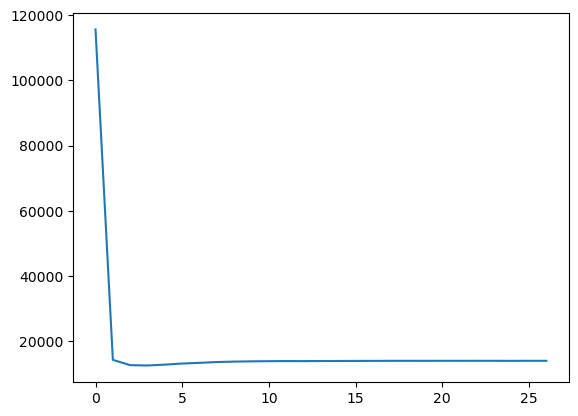

In [5]:
plt.plot(evs)

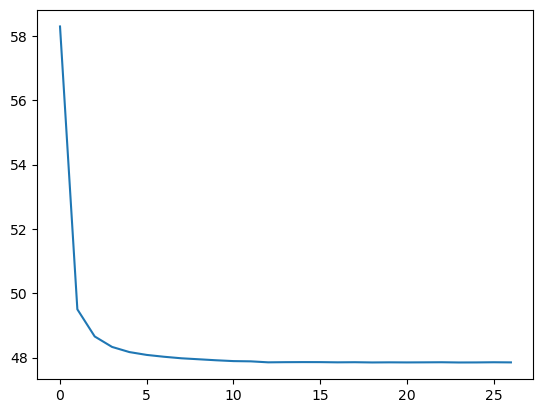

In [20]:
plt.plot(likes)

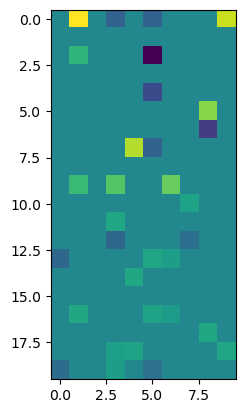

In [21]:
plt.imshow(dag_obj.A)

In [22]:
model.B

Parameter containing:
tensor([[ 0.0000,  1.9190,  0.0000, -0.4565,  0.0000, -0.4006,  0.0000,  0.0000,
          0.0000,  1.6252,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,
          0.0000,  0.0000,  0.0000,  0.0000],
        [ 0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,
          0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,
          0.0000,  0.0000,  0.0000,  0.0000],
        [ 0.0000,  0.6648,  0.0000,  0.0000,  0.0000, -1.6237,  0.0000,  0.0000,
          0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,
          0.0000,  0.0000,  0.0000,  0.0000],
        [ 0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,
          0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,
          0.0000,  0.0000,  0.0000,  0.0000],
        [ 0.0000,  0.0000,  0.0000,  0.0000,  0.0000, -0.8042,  0.0000,  0.0000,
          0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0

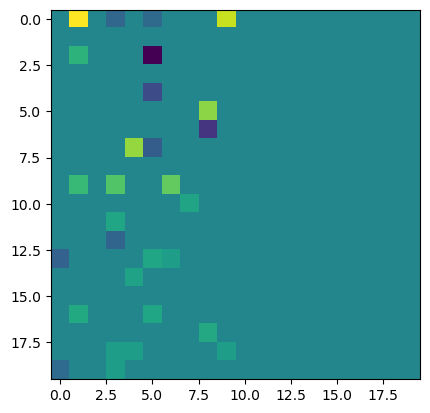

In [23]:
plt.imshow(model.B.detach().numpy())

In [24]:
model_B = model.B.detach().numpy()
model_B[np.abs(model_B) < 0.3] = 0

In [25]:
import testing_utils

In [26]:
model_B = testing_utils.postprocess(model_B)

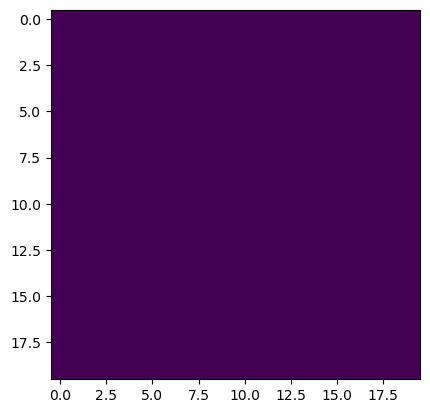

In [27]:
plt.imshow(testing_utils.postprocess(model_B) - model_B)

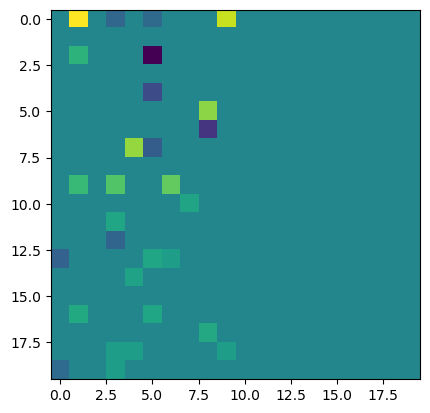

In [28]:
plt.imshow(model_B)

In [29]:
np.diag(model_B)

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0.], dtype=float32)

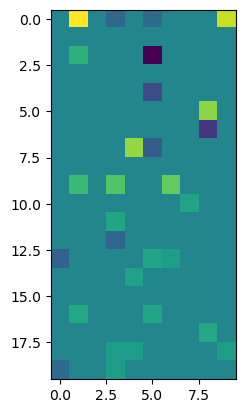

In [30]:
model_A = model_B[:, :d]
plt.imshow(model_A)

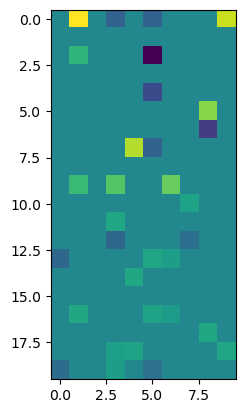

In [31]:
plt.imshow(dag_obj.A)

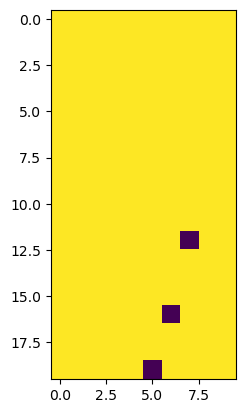

In [32]:
plt.imshow(((dag_obj.A != 0).astype(int) == (model_A !=0 ).astype(int))**2)

In [33]:
(dag_obj.A != 0).astype(int)

array([[0, 1, 0, 1, 0, 1, 0, 0, 0, 1],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 1, 0, 0, 0, 1, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 1, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 1, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 1, 0],
       [0, 0, 0, 0, 1, 1, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 1, 0, 1, 0, 0, 1, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 1, 0, 0],
       [0, 0, 0, 1, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 1, 0, 0, 0, 1, 0, 0],
       [1, 0, 0, 0, 0, 1, 1, 0, 0, 0],
       [0, 0, 0, 0, 1, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 1, 0, 0, 0, 1, 1, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 1, 0],
       [0, 0, 0, 1, 1, 0, 0, 0, 0, 1],
       [1, 0, 0, 1, 0, 1, 0, 0, 0, 0]])